### Matthew Collins
#### DSC 550: Week 6
#### 6.3 Exercise:  Original Analysis Case Study Part 1

#### Introduction:

I enjoy killing time with games. Being an avid gamer, I wanted to evaluate information that can be used to help me gain competitive insight. I am normally evaluating World of Warcraft (WOW). However, I decided to take on a new series of gaming data. The Pokemon series, while this is an old game, it consumed many wasted hours. With some of the new skills, I have been developing, I wanted to understand how I could have gained a competitive advantage back in my Pokemon days. What would my dream team of 6 Pokemon looks like? How could I maximize my offense and defense to dominate my opponents? My objective is to do the following:
* Identify the most powerful characters.
* More legendary Pokemon in certain generations?
* Set up a card defense that is optimized based on the 6 optimal characters.


#### Dataset Location:
The data set chosen is from Kaggle (https://www.kaggle.com/rounakbanik/pokemon).

In [1]:
# Import Libraries for use in this analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
import numpy as np
from yellowbrick.classifier import ConfusionMatrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [2]:
# Load the data set into a data frame

df_pokemon = pd.read_csv('pokemon.csv')

In [3]:
# View the first 5 rows of the dataframe

df_pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


#### Dataframe content definition:
* name: The English name of the Pokemon
* japanese_name: The Original Japanese name of the Pokemon
* pokedex_number: The entry number of the Pokemon in the National Pokedex
* percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
* type1: The Primary Type of the Pokemon
* type2: The Secondary Type of the Pokemon
* classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
* height_m: Height of the Pokemon in meters
* weight_kg: The Weight of the Pokemon in kilograms
* capture_rate: Capture Rate of the Pokemon
* baseeggsteps: The number of steps required to hatch an egg of the Pokemon
* abilities: A stringified list of abilities that the Pokemon is capable of having
* experience_growth: The Experience Growth of the Pokemon
* base_total: The sum of teh attack, defense, sp_attack, spe_defense, speed, and HP
* base_happiness: Base Happiness of the Pokemon
* against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
* hp: The Base HP of the Pokemon
* attack: The Base Attack of the Pokemon
* defense: The Base Defense of the Pokemon
* sp_attack: The Base Special Attack of the Pokemon
* sp_defense: The Base Special Defense of the Pokemon
* speed: The Base Speed of the Pokemon
* generation: The numbered generation which the Pokemon was first introduced
* is_legendary: Denotes if the Pokemon is legendary.


In [4]:
# Assess the shape of the dataframe

df_pokemon.shape

(801, 41)

The dataframe contains 801 rows and 41 columns.  
Each column represents a potential feature.  

Next steps are to begin describing the data to assist with target identification and reduction of features. 

In [5]:
# Assess the numeric data

df_pokemon.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [6]:
# Assess non-numeric data

df_pokemon.describe(exclude = 'number')

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801,417
unique,482,34,588,801,801,18,18
top,['Levitate'],45,Dragon Pokémon,Manyulaマニューラ,Sealeo,water,flying
freq,29,250,8,1,1,114,95


The initial dataframe reduction actions will be based on content knowledge.  As my objective is to optimize my 6 pokeman team for attack and defense, I am going to eliminate certain columns based on domain knowledge.  Columns to drop include: 

* abilities: Abilities descriptors do not influence the strength or effectiveness. 
* against_? columns: I will rely on the more traditional attack and defense information
* japanese_name: This is redundant name information. For this analysis, the name column will be utilized.  
* capture_rate: Does not factor into maximizing 6 person team potential
* base_egg_steps: Does not factor into maximizing attack and defense
* base_happiness: Does not factor into maximizing attack and defense
* pokedex_number: Does not factor into maximizing attack and defense
* experience_growth: Does not factor into maximizing attack and defense
* height_m: Height has no bearing on maximizing team power
* percentage_male: does not matter if the team is male or female
* weight_kg: Weight has no bearing on maximizing team power
* type_1 and type_2: Pokemon type does not influence best 6 members


Eliminating these initial columns will help with creating visuals and avoid crashing my system.  

In [7]:
# get a list of column names

col_names = df_pokemon.columns

col_names

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [68]:
# drop columns that are not pertinent to the analysis based on domain knowledge

df_pokemon.drop(columns = ['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 
                           'against_fairy', 'against_fight', 'against_fire', 'against_flying', 
                           'against_ghost', 'against_grass', 'against_ground', 'against_ice', 
                           'against_normal', 'against_poison', 'against_psychic', 'against_rock', 
                           'against_steel', 'against_water', 'base_egg_steps', 'base_happiness', 'height_m', 
                           'capture_rate', 'japanese_name', 'experience_growth', 'pokedex_number',
                           'weight_kg', 'percentage_male', 'type1', 'type2',], inplace = True)


In [69]:
# Evaluate the reduced data frame
df_pokemon.head()

,attack,base_total,classfication,defense,hp,name,sp_attack,sp_defense,speed,generation,is_legendary
0,49,318,Seed Pokémon,49,45,Bulbasaur,65,65,45,1,0
1,62,405,Seed Pokémon,63,60,Ivysaur,80,80,60,1,0
2,100,625,Seed Pokémon,123,80,Venusaur,122,120,80,1,0
3,52,309,Lizard Pokémon,43,39,Charmander,60,50,65,1,0
4,64,405,Flame Pokémon,58,58,Charmeleon,80,65,80,1,0


In [70]:
# Check the shape of the df

df_pokemon.shape

(801, 11)

The number of features have been reduced from 41 to 11 using domain knowledge of the game.  
The next step is to visualize the data using the remaining features and describe the numeric and non-numeric information.

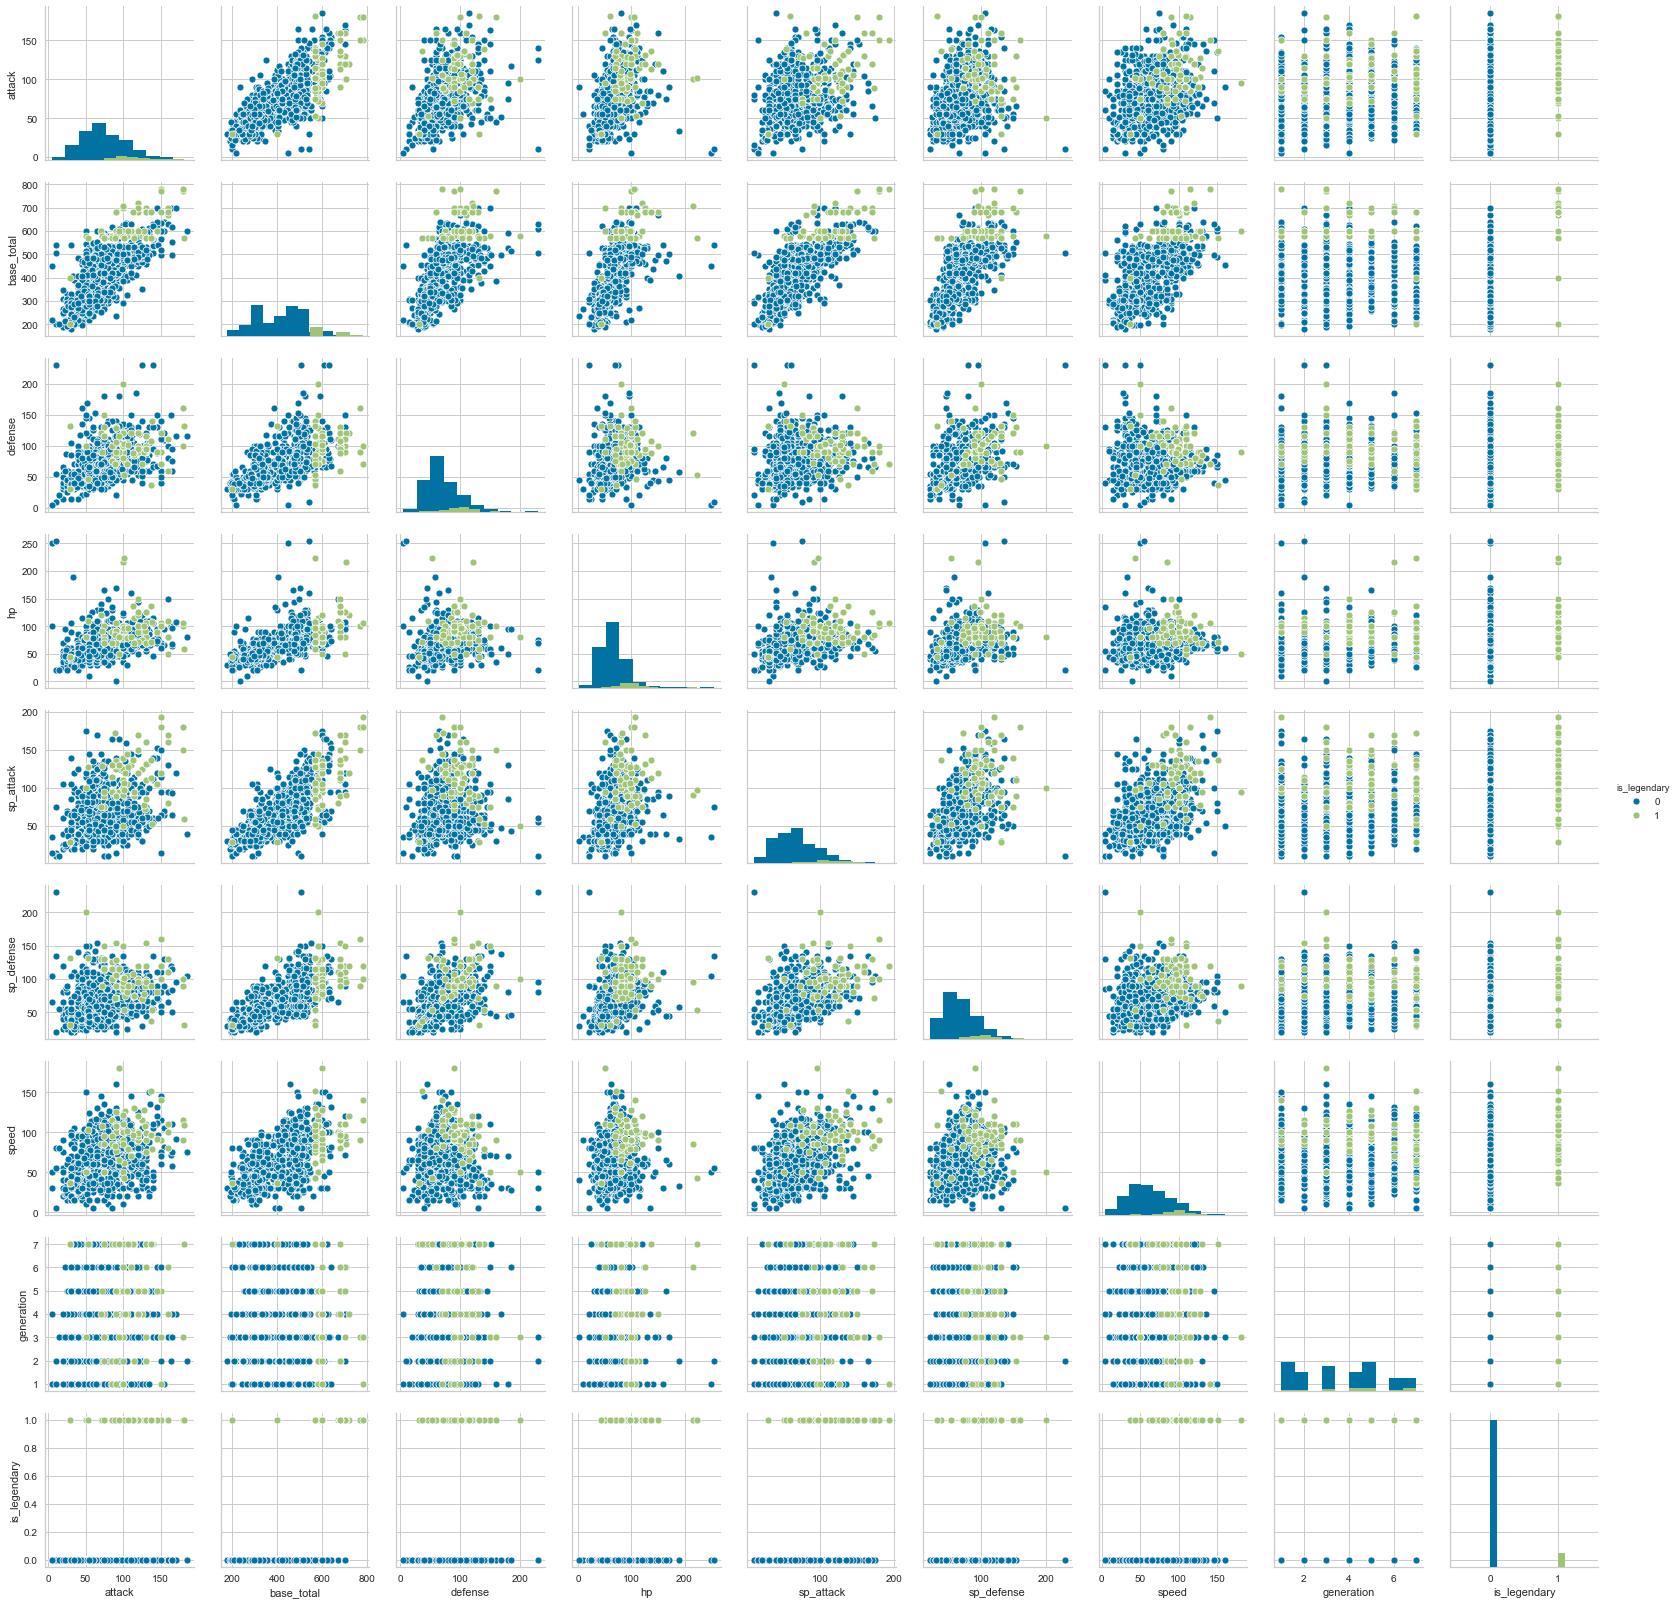

In [71]:
# Visualize the data using sns.pairplot 

sns.pairplot(df_pokemon, hue = 'is_legendary', diag_kind = 'hist')

In [72]:
# describe the numeric data of the reduced dataframe

df_pokemon.describe()

,attack,base_total,defense,hp,sp_attack,sp_defense,speed,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,77.857678,428.377029,73.008739,68.958801,71.305868,70.911361,66.334582,3.690387,0.087391
std,32.158820,119.203577,30.769159,26.576015,32.353826,27.942501,28.907662,1.930420,0.282583
min,5.000000,180.000000,5.000000,1.000000,10.000000,20.000000,5.000000,1.000000,0.000000
25%,55.000000,320.000000,50.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000
50%,75.000000,435.000000,70.000000,65.000000,65.000000,66.000000,65.000000,4.000000,0.000000
75%,100.000000,505.000000,90.000000,80.000000,91.000000,90.000000,85.000000,5.000000,0.000000
max,185.000000,780.000000,230.000000,255.000000,194.000000,230.000000,180.000000,7.000000,1.000000


In [73]:
# describe the non-numeric data of the reduced dataframe

df_pokemon.describe(exclude = 'number')

,classfication,name
count,801,801
unique,588,801
top,Dragon Pokémon,Carracosta
freq,8,1


In [74]:
# determine if there is any missing data

df_pokemon.isnull().sum()   # Summarizes the null values within the df

attack           0
base_total       0
classfication    0
defense          0
hp               0
name             0
sp_attack        0
sp_defense       0
speed            0
generation       0
is_legendary     0
dtype: int64

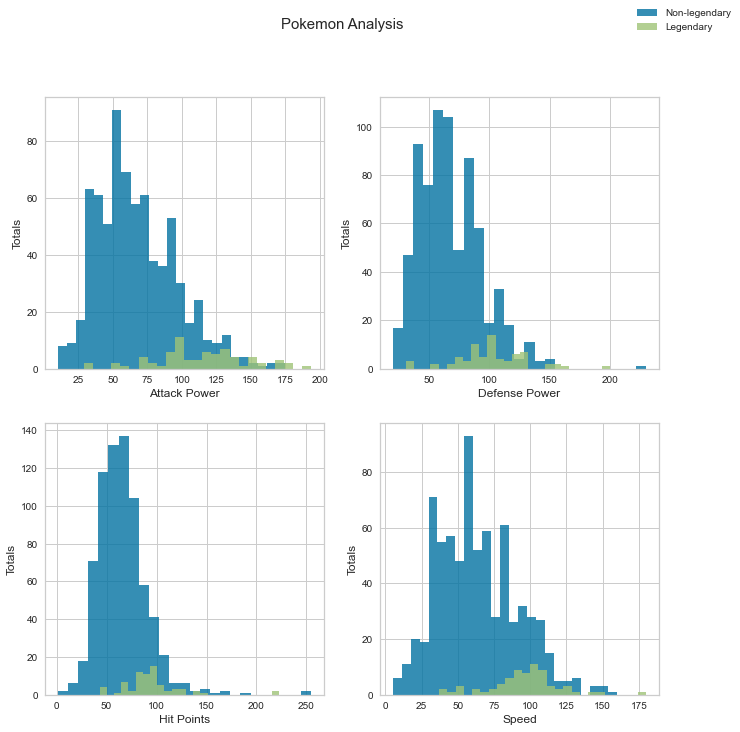

In [187]:
# Above histograms not what I had hoped for, took another approach to compare and contrast differences.

# create a 2 x 2 subplot
fig, ax = plt.subplots(2, 2, figsize = (11,11))

# set the histogram overlays to compare non-legendary to legendary Pokemon
x1_attack = df_pokemon.loc[df_pokemon['is_legendary'] == 0, 'sp_attack']
x2_attack = df_pokemon.loc[df_pokemon['is_legendary'] == 1, 'sp_attack']

x1_defense = df_pokemon.loc[df_pokemon['is_legendary'] == 0, 'sp_defense']
x2_defense = df_pokemon.loc[df_pokemon['is_legendary'] == 1, 'sp_defense']

x1_hp = df_pokemon.loc[df_pokemon['is_legendary'] == 0, 'hp']
x2_hp = df_pokemon.loc[df_pokemon['is_legendary'] == 1, 'hp']

x1_speed = df_pokemon.loc[df_pokemon['is_legendary'] == 0, 'speed']
x2_speed = df_pokemon.loc[df_pokemon['is_legendary'] == 1, 'speed']

# create the 4 different plots based on attack, defense, hp, and speed
ax[0,0].hist(x1_attack, bins = 25, alpha = 0.8) 
ax[0,0].hist(x2_attack, bins = 25, alpha = 0.8)
ax[0,0].set_xlabel('Attack Power', fontsize = 12)
ax[0,0].set_ylabel('Totals', fontsize = 12)

ax[0,1].hist(x1_defense, bins = 25, alpha = 0.8)
ax[0,1].hist(x2_defense, bins = 25, alpha = 0.8)
ax[0,1].set_xlabel('Defense Power', fontsize = 12)
ax[0,1].set_ylabel('Totals', fontsize = 12)

ax[1,0].hist(x1_hp, bins = 25, alpha = 0.8)
ax[1,0].hist(x2_hp, bins = 25, alpha = 0.8)
ax[1,0].set_xlabel('Hit Points', fontsize = 12)
ax[1,0].set_ylabel('Totals', fontsize = 12)

ax[1,1].hist(x1_speed, bins = 25, alpha = 0.8)
ax[1,1].hist(x2_speed, bins = 25, alpha = 0.8)
ax[1,1].set_xlabel('Speed', fontsize = 12)
ax[1,1].set_ylabel('Totals', fontsize = 12)

plt.suptitle('Pokemon Analysis', fontsize = 15)  # create an title for the entire subplot analysis
fig.legend(['Non-legendary', 'Legendary'])       # create a single legend for the entire subplot analysis

plt.show()

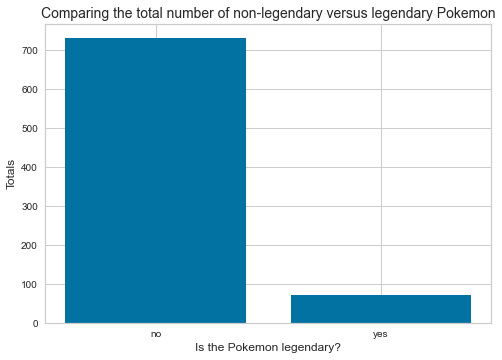

In [188]:
# Evaluate Bar charts of legendary vs. Non-legendary

# create varibables to count the difference between the number of legendary and non-legendary pokemon
is_legend = df_pokemon.replace({'is_legendary': {1: 'yes', 0:'no'}}).groupby('is_legendary').size().reset_index(name = 'Counts')['is_legendary']
is_not_legend = df_pokemon.replace({'is_legendary': {1: 'yes', 0:'no'}}).groupby('is_legendary').size().reset_index(name = 'Counts')['Counts']


plt.bar(is_legend, is_not_legend)
plt.title('Comparing the total number of non-legendary versus legendary Pokemon', fontsize = 14)
plt.xlabel('Is the Pokemon legendary?', fontsize = 12)
plt.ylabel('Totals', fontsize = 12)
plt.show()

Text(0, 0.5, 'Pokemon Class')

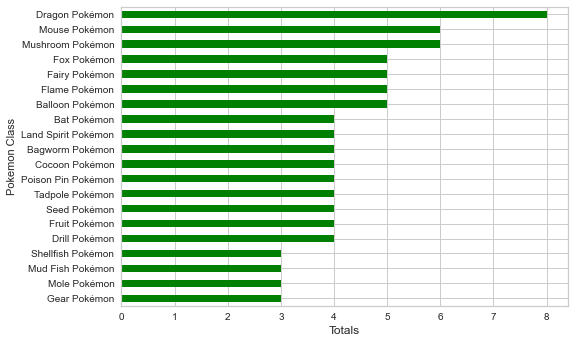

In [205]:
# Create a horizontal bar chart of the top 20 classes

poke_class = df_pokemon['classfication'].value_counts() # created a variable of the value counts

poke_class[:20].plot(kind = 'barh', color = 'green').invert_yaxis()      # plot the top 20 classes
plt.xlabel('Totals', fontsize = 12)
plt.ylabel('Pokemon Class')



Text(0, 0.5, 'Generation')

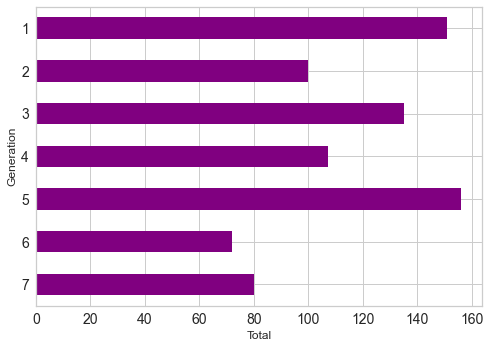

In [207]:
# Create a horizontal bar chart of the top 20 classes

poke_gen = df_pokemon['generation'].value_counts() # created a variable of the value counts

poke_gen[:7].plot(kind = 'barh', color = 'purple', fontsize = 14).invert_yaxis() # plot the generation totals
plt.xlabel('Total', fontsize = 12)
plt.ylabel('Generation', fontsize = 12)


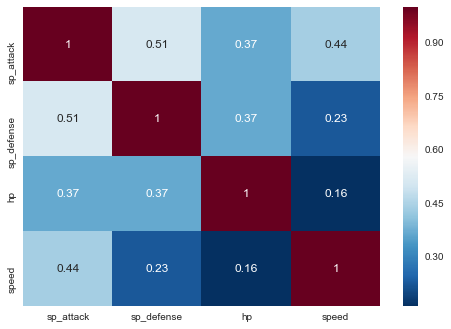

In [190]:
# Create correlation matrix

num_features = ['sp_attack', 'sp_defense', 'hp', 'speed']

pearsoncorr = df_pokemon[num_features].corr(method = 'pearson')

heat_map = sns.heatmap(pearsoncorr, 
                      xticklabels = pearsoncorr.columns,
                      yticklabels = pearsoncorr.columns,
                      cmap = 'RdBu_r',
                      annot = True)

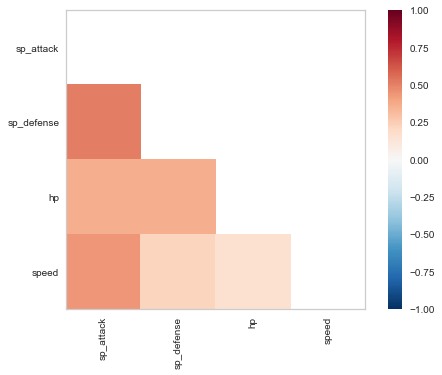

In [191]:
# Another look at the pearson correlation

# extract the numpy arrays from the data frame
X = df_pokemon[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                                                # Fit the data to the visualizer
visualizer.transform(X)                                          # Transform the data

plt.show()


#### Part 2:  Dimensionality Reduction

I went back to the original data set with 41 features.  I wanted to perform some analysis to confirm the domain expertise and determine if there are better features to select or extract.

In [8]:
# Reset the df for Part 2 analysis (back to original feature list)

df_pokemon = pd.read_csv('pokemon.csv')
df_pokemon # view the dataframe

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


### Conduct TSNE Analysis 

In [76]:
# Import library for analysis

from sklearn.manifold import TSNE


In [9]:
# drop the non-numeric data

non_numeric = ['abilities', 'capture_rate', 'classfication', 'japanese_name', 'name', 'type1', 'type2']
df_numeric = df_pokemon.drop(non_numeric, axis = 1)
df_numeric.shape

(801, 34)

In [10]:
# Check for NA values
df_numeric.isna().sum()

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64

In [11]:
# Replace the NA values with the median of the data set

def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(df_numeric['height_m'])    # fill in the height feature
print(df_numeric['height_m'].describe())  # check the result

fill_na_median(df_numeric['weight_kg'])   # fill in the weight feature
print(df_numeric['weight_kg'].describe()) # check the result

fill_na_median(df_numeric['percentage_male'])   # fill in the percentage male feature
print(df_numeric['percentage_male'].describe()) # check the result

count    801.000000
mean       1.159800
std        1.067044
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height_m, dtype: float64
count    801.000000
mean      60.527216
std      108.110181
min        0.100000
25%        9.300000
50%       27.300000
75%       61.500000
max      999.900000
Name: weight_kg, dtype: float64
count    801.000000
mean      54.524969
std       19.055207
min        0.000000
25%       50.000000
50%       50.000000
75%       50.000000
max      100.000000
Name: percentage_male, dtype: float64


In [12]:
# Recheck for NA values
df_numeric.isna().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [81]:
# Establish TSNE and the learn rate

m = TSNE(learning_rate=50)  # Create t-SNE variable with desired learning rate


In [82]:
# fit and transform the model 

tsne_features = m.fit_transform(df_numeric)  # fit and transform the dataframe 

tsne_features[1:4, :]  # view the first few features

array([[-38.928093 ,  -3.4936564],
       [-35.496284 ,  -4.617646 ],
       [-40.102673 ,  -2.6000435]], dtype=float32)

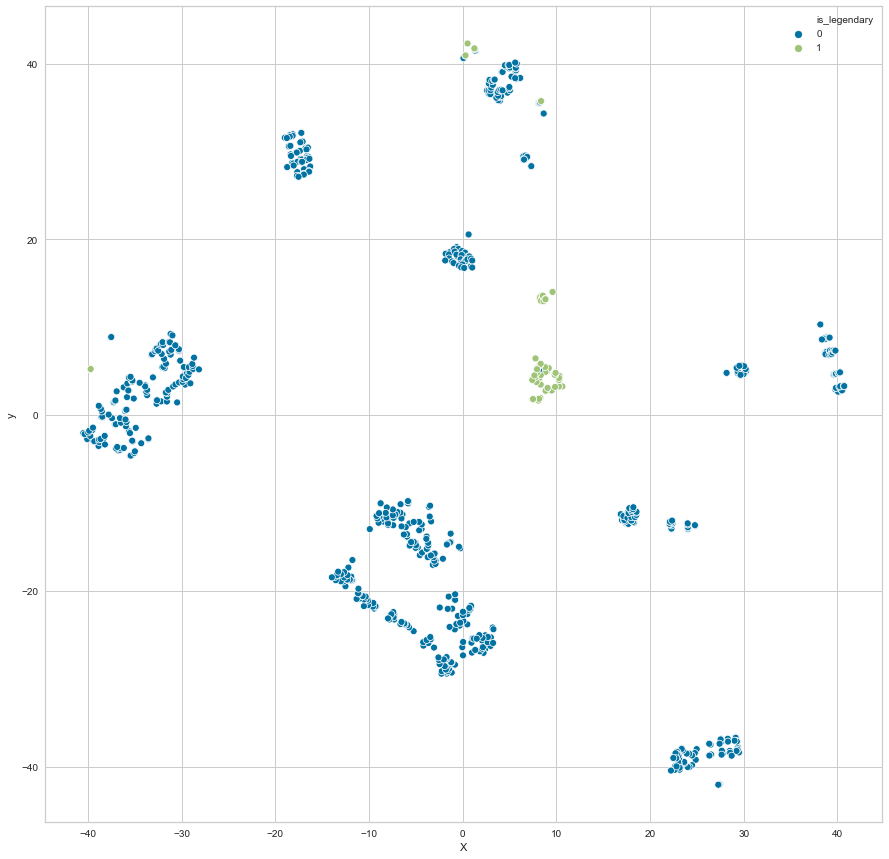

In [83]:
# Assign TSNE features to the dataset and provide data visualization

df_pokemon['X'] = tsne_features[:, 0]  # assing t-sne features to the data set for x 
df_pokemon['y'] = tsne_features[:, 1]  # assing t-sne features to the data set for y


fig, ax = plt.subplots(figsize = (15, 15))   # create the plot

sns.scatterplot(x= 'X', y = 'y', hue = 'is_legendary', data = df_pokemon)  # draw the figure
plt.show()

In [13]:
# Outline remaining columns names
df_numeric.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'defense', 'experience_growth',
       'height_m', 'hp', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

In [14]:
# Remove features based on variance threshold

sel = VarianceThreshold(threshold = 0.005) # Create a VarianceThreshold feature selector
sel.fit(df_numeric / df_numeric.mean())    # Fit the selector to normalized

mask = sel.get_support()                   # Create a boolean mask

reduced_df = df_numeric.loc[:, mask]       # Apply the mask to create a reduced dataframe

reduced_df.shape

# No reduction noted

(801, 34)

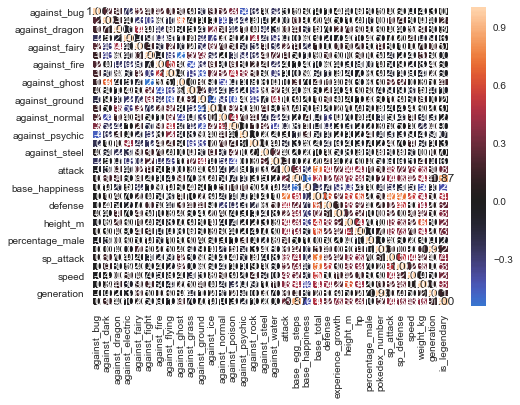

In [27]:
# Visualizing the correlation matrix (not much visual help)

corr = df_numeric.corr()                                           # Create the correlation matrix

sns.heatmap(corr, center = 0, linewidths=1, annot=True, fmt=".2f") # Draw the heatmap

plt.show()


In [15]:
# Filter out highly correlated features

# Calculate the correlation matrix and take the absolute value
corr_matrix = df_numeric.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = df_numeric.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 33 columns.


In [16]:
# View the remaining columns
reduced_df.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'defense', 'experience_growth',
       'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed',
       'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

### Part 3 Model Evaluation and Selection

### Build a classifier to determine to predict if a Pokemon is legendary.

In [34]:
# build classifier using Support Vector MAchine to predict legendary or not

y = df_numeric['is_legendary']  # feature to predict
X = df_numeric.drop('is_legendary', axis = 1)  # remove legendary column to create training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))


241 rows in test set vs. 560 in training set. 33 Features.


In [18]:
# Calculate the accuracy scores

svc = SVC()                # Create an instance of Support Vector Classification
svc.fit(X_train, y_train)  # fit the model to the training data

accuracy_train = accuracy_score(y_train, svc.predict(X_train))  # Calc accuracy score of train data
accuracy_test = accuracy_score(y_test, svc.predict(X_test))     # Calc accuracy score of test data

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

90.9% accuracy on test set vs. 91.4% on training set


### Will try and improve model accuracy using a Logistic Regression Classifier.  

In [35]:
# Build a logistic Regression classifier and remove features based on model accuracy and feature coefficients.

scaler = StandardScaler() # create the scaler 
lr = LogisticRegression() # create logistic regression


X_train_std = scaler.fit_transform(X_train) # fit the scaler on the training features and transform   

lr.fit(X_train_std, y_train)                # fit the logestic Regression model on the scaled training data

X_test_std = scaler.transform(X_test)       # Scale the test features

y_pred = lr.predict(X_test_std)             # Predict legedendary presence on the scaled test set


# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


98.8% accuracy on test set.
{'against_bug': 0.06, 'against_dark': 1.06, 'against_dragon': 0.57, 'against_electric': 0.22, 'against_fairy': 0.13, 'against_fight': 0.67, 'against_fire': 0.01, 'against_flying': 0.43, 'against_ghost': 1.25, 'against_grass': 0.13, 'against_ground': 0.73, 'against_ice': 0.19, 'against_normal': 0.03, 'against_poison': 0.58, 'against_psychic': 0.25, 'against_rock': 0.34, 'against_steel': 0.05, 'against_water': 0.17, 'attack': 0.17, 'base_egg_steps': 2.4, 'base_happiness': 0.37, 'base_total': 0.38, 'defense': 0.38, 'experience_growth': 1.15, 'height_m': 0.16, 'hp': 0.01, 'percentage_male': 0.36, 'pokedex_number': 0.33, 'sp_attack': 0.29, 'sp_defense': 0.36, 'speed': 0.34, 'weight_kg': 0.31, 'generation': 0.13}


E:\Anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


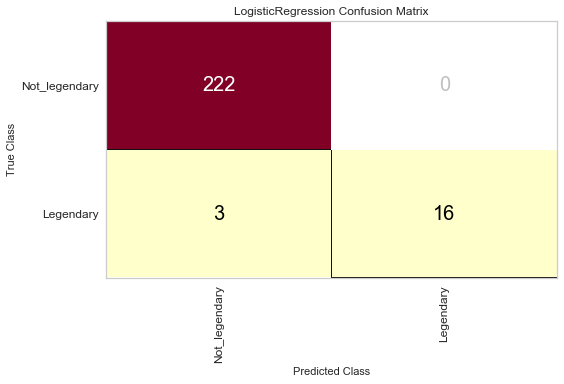

In [36]:
# Create a confusion matrix to see visually display how the model performed

model = LogisticRegression()

classes = ['Not_legendary', 'Legendary']  # variable to identify the classes

cm = ConfusionMatrix(model, classes = classes, percent = False) # create the Confusion Matrix variable

cm.fit(X_train, y_train) # fit the model

cm.score(X_test, y_test)  # score the model

for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

### The logistic regression model predicted with ~98% accuracy. It correctly identified all non-legendary and miss classified 4 of the 19 legendary Pokemon

In [37]:
# Print the sorted feature coefficients

feat_coeff = dict(zip(X.columns, abs(lr.coef_[0]).round(2)))
sorted(feat_coeff.items(), key = lambda x: x[1], reverse = True)

[('base_egg_steps', 2.4),
 ('against_ghost', 1.25),
 ('experience_growth', 1.15),
 ('against_dark', 1.06),
 ('against_ground', 0.73),
 ('against_fight', 0.67),
 ('against_poison', 0.58),
 ('against_dragon', 0.57),
 ('against_flying', 0.43),
 ('base_total', 0.38),
 ('defense', 0.38),
 ('base_happiness', 0.37),
 ('percentage_male', 0.36),
 ('sp_defense', 0.36),
 ('against_rock', 0.34),
 ('speed', 0.34),
 ('pokedex_number', 0.33),
 ('weight_kg', 0.31),
 ('sp_attack', 0.29),
 ('against_psychic', 0.25),
 ('against_electric', 0.22),
 ('against_ice', 0.19),
 ('against_water', 0.17),
 ('attack', 0.17),
 ('height_m', 0.16),
 ('against_fairy', 0.13),
 ('against_grass', 0.13),
 ('generation', 0.13),
 ('against_bug', 0.06),
 ('against_steel', 0.05),
 ('against_normal', 0.03),
 ('against_fire', 0.01),
 ('hp', 0.01)]

In [88]:
# Eliminate features with coeffiecients < 0.4

key_drop = []

for key, val in feat_coeff.items():
    if val > 0.5:
        key_drop.append(key)
        
key_drop



['against_dark',
 'against_dragon',
 'against_fight',
 'against_ghost',
 'against_ground',
 'against_poison',
 'base_egg_steps',
 'experience_growth']

In [108]:
df_elim_feature_coeff = df_numeric[key_drop]
df_elim_feature_coeff['is_legendary'] = df_numeric['is_legendary']
df_elim_feature_coeff

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,against_dark,against_dragon,against_fight,against_ghost,against_ground,against_poison,base_egg_steps,experience_growth,is_legendary
0,1.0,1.0,0.5,1.0,1.0,1.0,5120,1059860,0
1,1.0,1.0,0.5,1.0,1.0,1.0,5120,1059860,0
2,1.0,1.0,0.5,1.0,1.0,1.0,5120,1059860,0
3,1.0,1.0,1.0,1.0,2.0,1.0,5120,1059860,0
4,1.0,1.0,1.0,1.0,2.0,1.0,5120,1059860,0
...,...,...,...,...,...,...,...,...,...
796,1.0,0.5,1.0,1.0,0.0,0.0,30720,1250000,1
797,1.0,0.5,2.0,1.0,1.0,0.0,30720,1250000,1
798,0.5,2.0,2.0,0.5,1.0,1.0,30720,1250000,1
799,2.0,1.0,0.5,2.0,1.0,1.0,30720,1250000,1


In [128]:
# Performe LR model on the new df, split the data

y_new = df_elim_feature_coeff['is_legendary']  # feature to predict
X_new = df_elim_feature_coeff.drop('is_legendary', axis = 1)  # remove legendary column to create training data

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

241 rows in test set vs. 560 in training set. 8 Features.


In [129]:
# Build new lR model and outline prediiction accuracy

scaler = StandardScaler() # create the scaler 
lr = LogisticRegression() # create logistic regression


X_train_std = scaler.fit_transform(X_train) # fit the scaler on the training features and transform   

lr.fit(X_train_std, y_train)                # fit the logestic Regression model on the scaled training data

X_test_std = scaler.transform(X_test)       # Scale the test features

y_pred = lr.predict(X_test_std)             # Predict legedendary presence on the scaled test set


# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X_new.columns, abs(lr.coef_[0]).round(2))))

99.2% accuracy on test set.
{'against_dark': 0.7, 'against_dragon': 0.72, 'against_fight': 0.41, 'against_ghost': 0.53, 'against_ground': 0.36, 'against_poison': 0.36, 'base_egg_steps': 2.49, 'experience_growth': 1.03}


E:\Anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


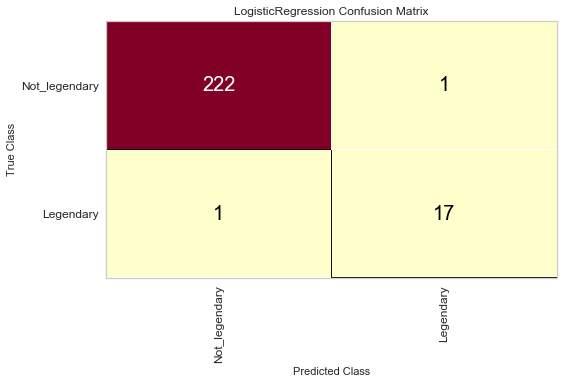

In [130]:
# Create a confusion matrix to see visually display how the model performed using the df with only 9 features

model = LogisticRegression()

classes = ['Not_legendary', 'Legendary']  # variable to identify the classes

cm = ConfusionMatrix(model, classes = classes, percent = False) # create the Confusion Matrix variable

cm.fit(X_train, y_train) # fit the model

cm.score(X_test, y_test)  # score the model

for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

#### I went from 33 to 8 features by eliminating any feature with a coefficient of < 0.5.  Model accuracy stayed the same at ~99%.  Less features makes the model less cumbersome.  I wonder if my unbalanced data set has something to do with the accuracy.  

### In my original week 1 test, I dropped columns based on domain knowledge.  Let's see how my domain knowledge performs against these computer based algorithms.

In [102]:
# reset df


df = pd.read_csv('pokemon.csv')

df.drop(columns = ['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 
                           'against_fairy', 'against_fight', 'against_fire', 'against_flying', 
                           'against_ghost', 'against_grass', 'against_ground', 'against_ice', 
                           'against_normal', 'against_poison', 'against_psychic', 'against_rock', 
                           'against_steel', 'against_water', 'base_egg_steps', 'base_happiness', 'height_m', 
                           'capture_rate', 'japanese_name', 'experience_growth', 'pokedex_number',
                           'weight_kg', 'percentage_male', 'type1', 'type2', 'classfication', 'name'], inplace = True)

df.head()

,attack,base_total,defense,hp,sp_attack,sp_defense,speed,generation,is_legendary
0,49,318,49,45,65,65,45,1,0
1,62,405,63,60,80,80,60,1,0
2,100,625,123,80,122,120,80,1,0
3,52,309,43,39,60,50,65,1,0
4,64,405,58,58,80,65,80,1,0


In [103]:
# Split the data 

y = df['is_legendary']  # feature to predict
X = df.drop('is_legendary', axis = 1)  # remove legendary column to create training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

241 rows in test set vs. 560 in training set. 8 Features.


In [104]:
# Build my domain expertise LR model and outline prediiction accuracy

scaler = StandardScaler() # create the scaler 
lr = LogisticRegression() # create logistic regression


X_train_std = scaler.fit_transform(X_train) # fit the scaler on the training features and transform   

lr.fit(X_train_std, y_train)                # fit the logestic Regression model on the scaled training data

X_test_std = scaler.transform(X_test)       # Scale the test features

y_pred = lr.predict(X_test_std)             # Predict legedendary presence on the scaled test set


# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

97.1% accuracy on test set.
{'attack': 0.05, 'base_total': 0.98, 'defense': 0.78, 'hp': 0.84, 'sp_attack': 0.6, 'sp_defense': 0.57, 'speed': 1.09, 'generation': 0.9}


E:\Anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


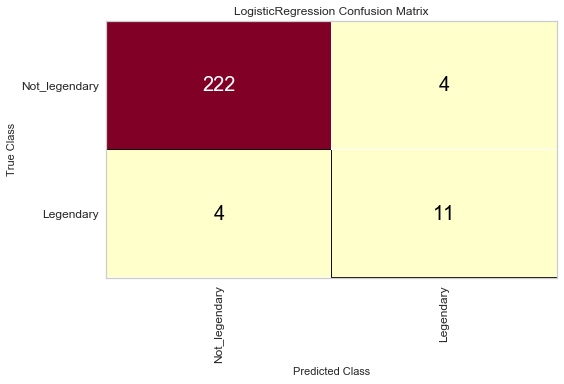

In [105]:
model = LogisticRegression()

classes = ['Not_legendary', 'Legendary']  # variable to identify the classes

cm = ConfusionMatrix(model, classes = classes, percent = False) # create the Confusion Matrix variable

cm.fit(X_train, y_train) # fit the model

cm.score(X_test, y_test)  # score the model

for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

### My domain expertise came in at ~97% accurate.   Less than the other prediction approaches.  

,against_dark,against_dragon,against_fight,against_ghost,against_ground,against_poison,base_egg_steps,experience_growth
665,1.0,1.0,0.25,1.0,0.0,1.00,3840,1000000
791,4.0,1.0,0.00,4.0,1.0,0.50,30720,1250000
650,1.0,1.0,1.00,1.0,0.5,2.00,5120,1059860
766,1.0,1.0,0.50,1.0,0.5,1.00,5120,1000000
702,0.5,0.0,1.00,1.0,2.0,1.00,6400,1250000
...,...,...,...,...,...,...,...,...
651,0.5,1.0,1.00,1.0,0.5,2.00,5120,1059860
33,1.0,1.0,0.50,1.0,2.0,0.25,5120,1059860
376,1.0,1.0,2.00,1.0,2.0,0.50,20480,1250000
94,1.0,1.0,2.00,1.0,2.0,0.25,6400,1000000


In [131]:
df['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64